# Coverage & Efficiency Plotting (ID and OOD)

This notebook demonstrates how to evaluate and visualize the performance of uncertainty estimation methods.

We will focus on the trade-off between **Coverage** (how much of the data is retained based on confidence) and **Efficiency** (the size of the prediction sets). The goal is to see how well our model handles data it knows well (**In-Distribution**) versus data it hasn't seen before (**Out-of-Distribution**).

We use the `CoverageEfficiencyVisualizer` to visualize these metrics.

## 1. Import Libraries

First, we import the necessary modules. We will use the custom visualization tools provided in the `probly` package.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Importing the provided modules
try:
    from probly.visualization.plot_coverage_final import CoverageEfficiencyVisualizer
except ImportError:
    # Fallback for local directory
    from plot_coverage_final import CoverageEfficiencyVisualizer

# Optional: Set random seed for reproducibility
np.random.seed(42)

# Initialize the visualizer class once
visualizer = CoverageEfficiencyVisualizer()

## 2. In-Distribution (ID) Analysis

**In-Distribution** data refers to data that comes from the same distribution as the training set. 

Ideally, for ID data:
* The model should be **confident** in its predictions.
* The probabilities should be "peaked" around the correct class.
* We expect high efficiency (small prediction sets) and high coverage.

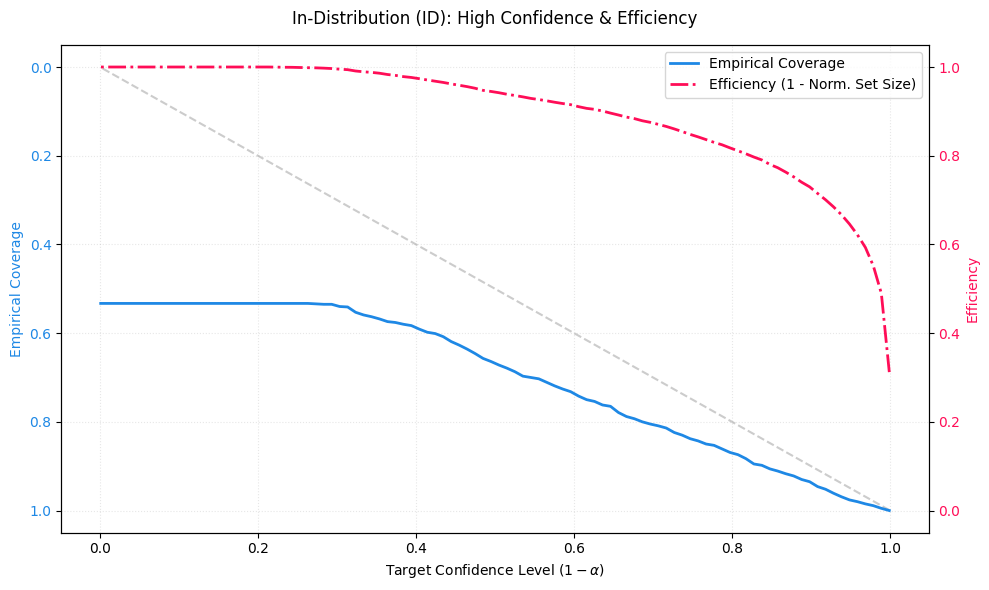

In [2]:
# --- Generate ID Data ---
n_samples = 1000
n_classes = 10

# Simulate confident predictions: Low alpha (0.2) creates "peaked" distributions
probs_id = np.random.dirichlet(alpha=np.ones(n_classes) * 0.2, size=n_samples)

# Generate targets based on these probabilities (model is mostly right)
targets_id = np.array([np.random.choice(n_classes, p=p) for p in probs_id])

# --- Plot ID ---
fig, ax = plt.subplots(figsize=(10, 6))

visualizer.plot_coverage_efficiency(
    probs=probs_id, targets=targets_id, title="In-Distribution (ID): High Confidence & Efficiency", ax=ax
)

plt.tight_layout()
plt.show()

## 3. Out-of-Distribution (OOD) Analysis

**Out-of-Distribution** data is data that is semantically different from what the model saw during training. 

In this scenario, the model often becomes "confused". Its predictions might be flat (uniform distribution) or incorrectly confident. Here, we simulate a scenario where the model is uncertain (uniform probabilities).

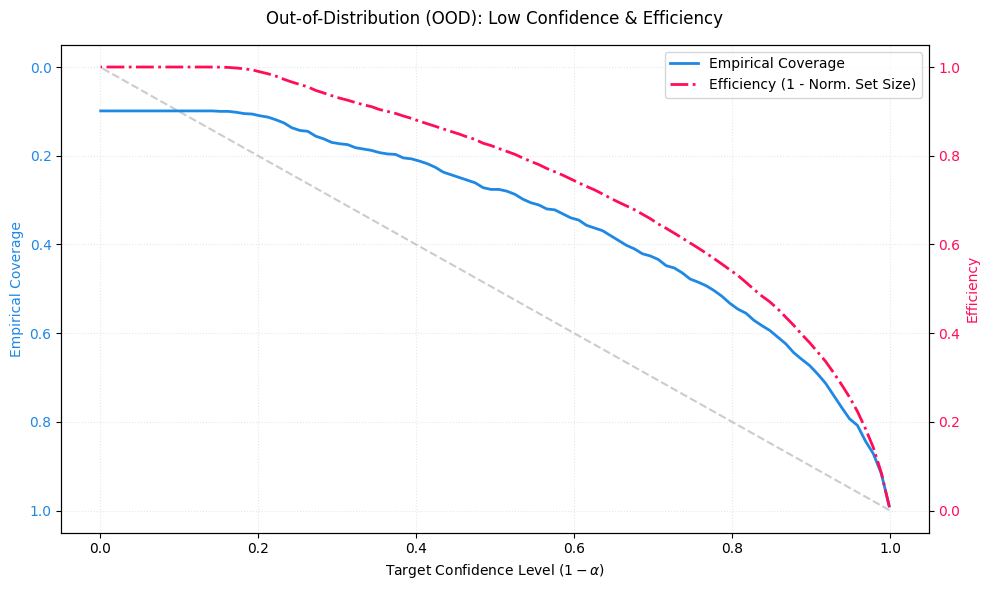

In [3]:
# --- Generate OOD Data ---
# Simulate uncertain predictions: Alpha=1.0 creates flat/random distributions
probs_ood = np.random.dirichlet(alpha=np.ones(n_classes) * 1.0, size=n_samples)

# Targets are random integers (no correlation to probability)
targets_ood = np.random.randint(0, n_classes, size=n_samples)

# --- Plot OOD ---
fig, ax = plt.subplots(figsize=(10, 6))

visualizer.plot_coverage_efficiency(
    probs=probs_ood, targets=targets_ood, title="Out-of-Distribution (OOD): Low Confidence & Efficiency", ax=ax
)

plt.tight_layout()
plt.show()

## 4. Understanding the Plots

The plots display two key metrics against the **Target Confidence Level** ($1 - \alpha$):

1.  **Empirical Coverage (Blue Line)**:
    * Represents the fraction of samples where the true label is contained within the prediction set.
    * **Note on Axis**: The Y-axis for coverage is **inverted** (0 is at the top, 1 is at the bottom). This means the curve flows visually from top-left to bottom-right.

2.  **Efficiency (Red Line)**:
    * Represents the normalized size of the prediction sets.
    * **Direction**: 1.0 (Best Efficiency / Small Sets) is at the top, 0.0 (Worst Efficiency / Large Sets) is at the bottom.
    * This alignment ensures that both the blue and red lines flow visually from top-left (low confidence) to bottom-right (high confidence).

### Conclusion

* **Gap Analysis**: A large gap between the Empirical Coverage (Blue) and Ideal Coverage (Dashed) indicates that the model is miscalibrated (over- or under-confident).
* **OOD Behavior**: On OOD data, we typically see the Efficiency (Red) drop drastically as we demand higher coverage, showing the high "cost" of uncertainty.